<h1>7 Park SQL Exercises</h1>

<p>The team explored BigQuery and ran some queries in the console to become familiar with BigQuery.  After studying the documentation further, we were able to learn about the Jupyter Notebook package for BigQuery and we use it here to answer the SQL questions</p

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
from google.cloud import bigquery

In [3]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="./utility-vista-307720-6cec755818c9.json"
client = bigquery.Client()

In [4]:
%load_ext google.cloud.bigquery

<h1>SQL Question 1</h1>

In [5]:
%%bigquery state_2018_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.state_2018_5yr`

Downloading: 100%|██████████| 52/52 [00:01<00:00, 27.27rows/s]


<h2>2018 5 year Weighted Mean of per capita US Income by population </h2>
<p> Methodology: (1) multiply per capita income for each state with population of that state
(2) sum above for all states and divide with total population of the United States</p>

In [6]:
us_pop = state_2018_5yr['total_pop'].sum()
average_income =  ((state_2018_5yr['income_per_capita']*state_2018_5yr['total_pop']).sum())/us_pop
print(f'${round(average_income,2)}')

$32411.26


<h2>2018 5 year Weighted Median of US Income by household aggregations</h2>
<p> Methodology: (1)add up households in each income bin (2)calculate midpoint of households by summing up all US households by 2 (3)find household midpoint among the bins in step (4)use the midpoint of the bin found in</p>

In [7]:
bins_ = [
    'income_less_10000',
    'income_10000_14999',
    'income_15000_19999',
    'income_20000_24999',
    'income_25000_29999',
    'income_30000_34999',
    'income_35000_39999',
    'income_40000_44999',
    'income_45000_49999',
    'income_50000_59999',
    'income_60000_74999',
    'income_75000_99999',
    'income_100000_124999',
    'income_125000_149999',
    'income_150000_199999',
    'income_200000_or_more'
]
binMiddle = [
    5000,
    12500,
    17500,
    22500,
    27500,
    32500,
    37500,
    42500,
    47500,
    55000,
    67500,
    87500,
    112500,
    137500,
    175000,
    300000
    
]
binRangeLow = [0,10000,15000,20000,25000,30000,35000,40000,45000,50000,60000,75000,100000,125000,150000,200000]
binRangeHigh = [10000,14999,19999,24999,29999,34999,39999,44999,49999,59999,74999,99999,124999,149999,199999,350000]

def medianHouseholdIncome(householdBins,midPointHouseholds):   
    medianHouseholds=0
    for idx,households in enumerate(householdBins):
            medianHouseholds+=households
            if medianHouseholds >= midPointHouseholds:
                binInterval=binRangeHigh[idx]-binRangeLow[idx]
                return binRangeLow[idx]+((medianHouseholds-midPointHouseholds)/households)*binInterval

usHouseholdBins=[]
for bin in bins_:
        usHouseholdBins.append(state_2018_5yr[bin].sum())
midPointUSHouseholds=state_2018_5yr['households'].sum()/2
print(f'${round(medianHouseholdIncome(usHouseholdBins,midPointUSHouseholds),2)}')

$50216.1


<h2>2018 5 year United States Income by households Bar graph and skewness</h2>

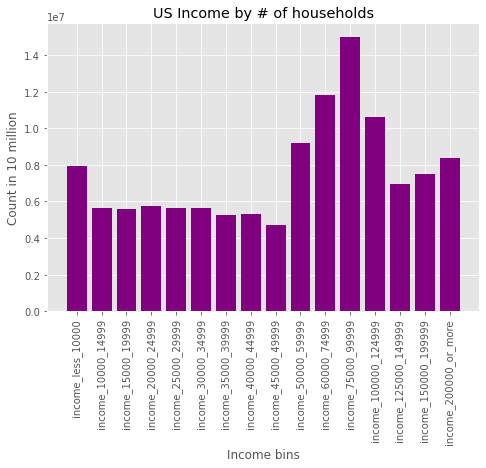

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(bins_,usHouseholdBins,color="purple")
plt.xticks(rotation=90)
ax.set_title("US Income by # of households")
ax.set_xlabel("Income bins")
ax.set_ylabel("Count in 10 million")
plt.show()

<h1>2018 5 year United States Income Percentile ranking</h1>

In [9]:
#calculate bin percentages
def calc_household_perc(householdBins):
    accumulatedBins=[]
    totalbins=np.sum(householdBins)
    sum=0
    for bin in householdBins:
        sum+=bin
        accumulatedBins.append(round(sum/totalbins*100))
    return accumulatedBins

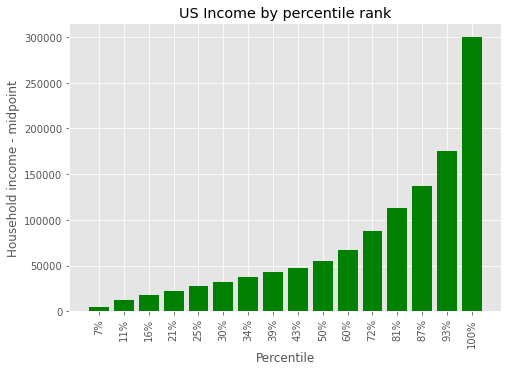

In [10]:
#United States percentile breakdown 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
incomeBins = [str(val)+'%' for val in calc_household_perc(usHouseholdBins)]
ax.bar(incomeBins,binMiddle, color="green")
ax.set_title("US Income by percentile rank")
ax.set_xlabel("Percentile")
ax.set_ylabel("Household income - midpoint")
plt.xticks(rotation=90)
plt.show()

<h1>2018 5 year New York Income Percentile ranking</h1>

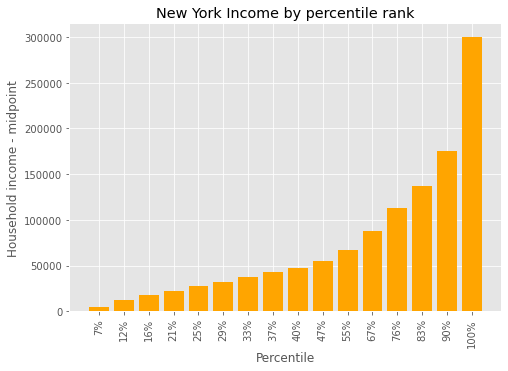

In [26]:
#New York percentile breakdown
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
incomeBins = [str(val)+'%' for val in calc_household_perc(state_2018_5yr[state_2018_5yr['geo_id']=='36'][bins_].values.tolist()[0])]
ax.bar(incomeBins,binMiddle,color="orange")
plt.xticks(rotation=90)
ax.set_title("New York Income by percentile rank")
ax.set_xlabel("Percentile")
ax.set_ylabel("Household income - midpoint")
plt.show()


<h1>2018 5 year California Income Percentile ranking</h1>

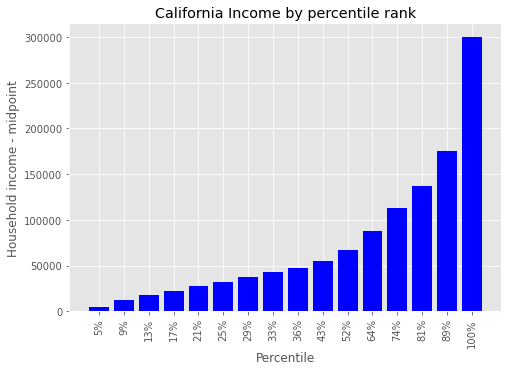

In [27]:
#California percentile breakdown
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
incomeBins = [str(val)+'%' for val in calc_household_perc(state_2018_5yr[state_2018_5yr['geo_id']=='06'][bins_].values.tolist()[0])]
ax.bar(incomeBins,binMiddle,color="blue")
plt.xticks(rotation=90)
ax.set_title("California Income by percentile rank")
ax.set_xlabel("Percentile")
ax.set_ylabel("Household income - midpoint")
plt.show()

<h1>2018 5 year Texas Income Percentile ranking</h1>

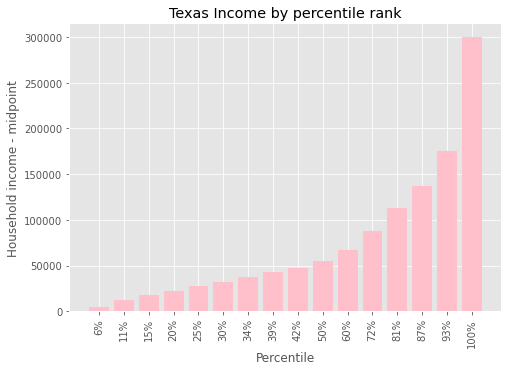

In [29]:
#Texas percentile breakdown
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
incomeBins = [str(val)+'%' for val in calc_household_perc(state_2018_5yr[state_2018_5yr['geo_id']=='48'][bins_].values.tolist()[0])]
ax.bar(incomeBins,binMiddle, color="pink")
plt.xticks(rotation=90)
ax.set_title("Texas Income by percentile rank")
ax.set_xlabel("Percentile")
ax.set_ylabel("Household income - midpoint")
plt.show()

<h1>2018 5 year Florida Income Percentile ranking</h1>

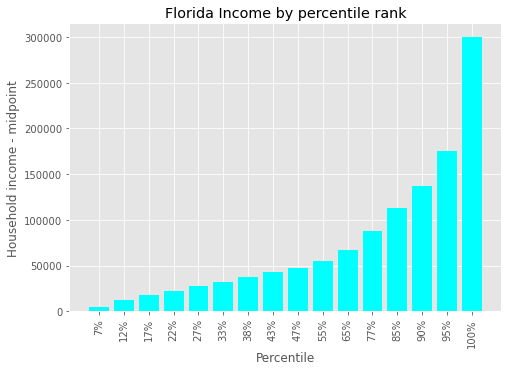

In [30]:
#Florida
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
incomeBins = [str(val)+'%' for val in calc_household_perc(state_2018_5yr[state_2018_5yr['geo_id']=='12'][bins_].values.tolist()[0])]
ax.bar(incomeBins,binMiddle,color="aqua")
plt.xticks(rotation=90)
ax.set_title("Florida Income by percentile rank")
ax.set_xlabel("Percentile")
ax.set_ylabel("Household income - midpoint")
plt.show()

<h1>Question 2</h1>

In [15]:
%%bigquery state_7yrs
SELECT geo_id,
    do_date,
    income_per_capita,
    total_pop,
    households,
    median_income,
    income_less_10000,
    income_10000_14999,
    income_15000_19999,
    income_20000_24999,
    income_25000_29999,
    income_30000_34999,
    income_35000_39999,
    income_40000_44999,
    income_45000_49999,
    income_50000_59999,
    income_60000_74999,
    income_75000_99999,
    income_100000_124999,
    income_125000_149999,
    income_150000_199999,
    income_200000_or_more
FROM `bigquery-public-data.census_bureau_acs.state_2012_1yr`
UNION ALL
SELECT geo_id,
    do_date,
    income_per_capita,
    total_pop,
    households,
    median_income,
    income_less_10000,
    income_10000_14999,
    income_15000_19999,
    income_20000_24999,
    income_25000_29999,
    income_30000_34999,
    income_35000_39999,
    income_40000_44999,
    income_45000_49999,
    income_50000_59999,
    income_60000_74999,
    income_75000_99999,
    income_100000_124999,
    income_125000_149999,
    income_150000_199999,
    income_200000_or_more
FROM `bigquery-public-data.census_bureau_acs.state_2013_1yr`
UNION ALL
SELECT geo_id,
    do_date,
    income_per_capita,
    total_pop,
    households,
    median_income,
    income_less_10000,
    income_10000_14999,
    income_15000_19999,
    income_20000_24999,
    income_25000_29999,
    income_30000_34999,
    income_35000_39999,
    income_40000_44999,
    income_45000_49999,
    income_50000_59999,
    income_60000_74999,
    income_75000_99999,
    income_100000_124999,
    income_125000_149999,
    income_150000_199999,
    income_200000_or_more
FROM `bigquery-public-data.census_bureau_acs.state_2014_1yr`
UNION ALL
SELECT geo_id,
    do_date,
    income_per_capita,
    total_pop,
    households,
    median_income,
    income_less_10000,
    income_10000_14999,
    income_15000_19999,
    income_20000_24999,
    income_25000_29999,
    income_30000_34999,
    income_35000_39999,
    income_40000_44999,
    income_45000_49999,
    income_50000_59999,
    income_60000_74999,
    income_75000_99999,
    income_100000_124999,
    income_125000_149999,
    income_150000_199999,
    income_200000_or_more
FROM `bigquery-public-data.census_bureau_acs.state_2015_1yr`
UNION ALL
SELECT geo_id,
    do_date,
    income_per_capita,
    total_pop,
    households,
    median_income,
    income_less_10000,
    income_10000_14999,
    income_15000_19999,
    income_20000_24999,
    income_25000_29999,
    income_30000_34999,
    income_35000_39999,
    income_40000_44999,
    income_45000_49999,
    income_50000_59999,
    income_60000_74999,
    income_75000_99999,
    income_100000_124999,
    income_125000_149999,
    income_150000_199999,
    income_200000_or_more
FROM `bigquery-public-data.census_bureau_acs.state_2016_1yr`
UNION ALL
SELECT geo_id,
    do_date,
    income_per_capita,
    total_pop,
    households,
    median_income,
    income_less_10000,
    income_10000_14999,
    income_15000_19999,
    income_20000_24999,
    income_25000_29999,
    income_30000_34999,
    income_35000_39999,
    income_40000_44999,
    income_45000_49999,
    income_50000_59999,
    income_60000_74999,
    income_75000_99999,
    income_100000_124999,
    income_125000_149999,
    income_150000_199999,
    income_200000_or_more
FROM `bigquery-public-data.census_bureau_acs.state_2017_1yr`
UNION ALL
SELECT geo_id,
    do_date,
    income_per_capita,
    total_pop,
    households,
    median_income,
    income_less_10000,
    income_10000_14999,
    income_15000_19999,
    income_20000_24999,
    income_25000_29999,
    income_30000_34999,
    income_35000_39999,
    income_40000_44999,
    income_45000_49999,
    income_50000_59999,
    income_60000_74999,
    income_75000_99999,
    income_100000_124999,
    income_125000_149999,
    income_150000_199999,
    income_200000_or_more
FROM `bigquery-public-data.census_bureau_acs.state_2018_1yr`
ORDER BY do_date;

Downloading: 100%|██████████| 364/364 [00:01<00:00, 208.57rows/s]


<h1>2013-2018 Income per capita mean growth rate</h1>

In [16]:
average_per_capita_income_by_year=state_7yrs.groupby("do_date")['income_per_capita'].agg(['mean']).reset_index()
average_per_capita_income_by_year['Mean_change']=average_per_capita_income_by_year['mean'].pct_change()
average_per_capita_income_by_year.drop([0],inplace=True)
average_per_capita_income_by_year.drop(["mean"],inplace=True,axis=1)

<AxesSubplot:xlabel='do_date'>

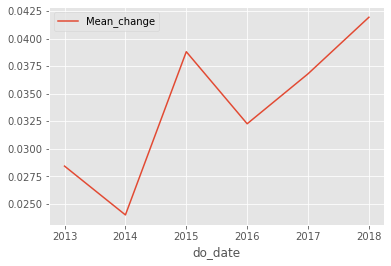

In [17]:
average_per_capita_income_by_year.plot(x="do_date",y="Mean_change")

<h1>2013-2018 Household Income median growth rate</h1>

In [18]:
def getMedian(sums_row):
    return (medianHouseholdIncome(sums_row[bins_].values,sums_row["midPointHouseholds"]))

<AxesSubplot:xlabel='Year'>

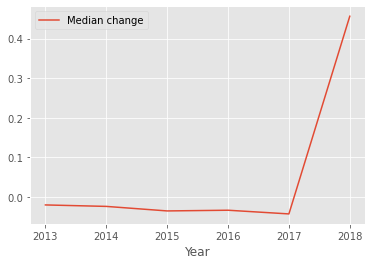

In [19]:
sums_by_year=state_7yrs.groupby("do_date").agg(['sum']).reset_index()
sums_by_year.columns = sums_by_year.columns.get_level_values(0)
sums_by_year["midPointHouseholds"]=sums_by_year["households"]/2
sums_by_year["median"]=sums_by_year.apply(lambda x: getMedian(x),axis=1)
sums_by_year['median_change']=sums_by_year["median"].pct_change()
median_household_income_by_year=pd.DataFrame({'Year':sums_by_year["do_date"],'Median change':sums_by_year["median_change"]})
median_household_income_by_year.drop([0],inplace=True)
median_household_income_by_year.plot(x="Year",y="Median change")

<h1>2013-2018 United States household income aggregation bar chart</h1>

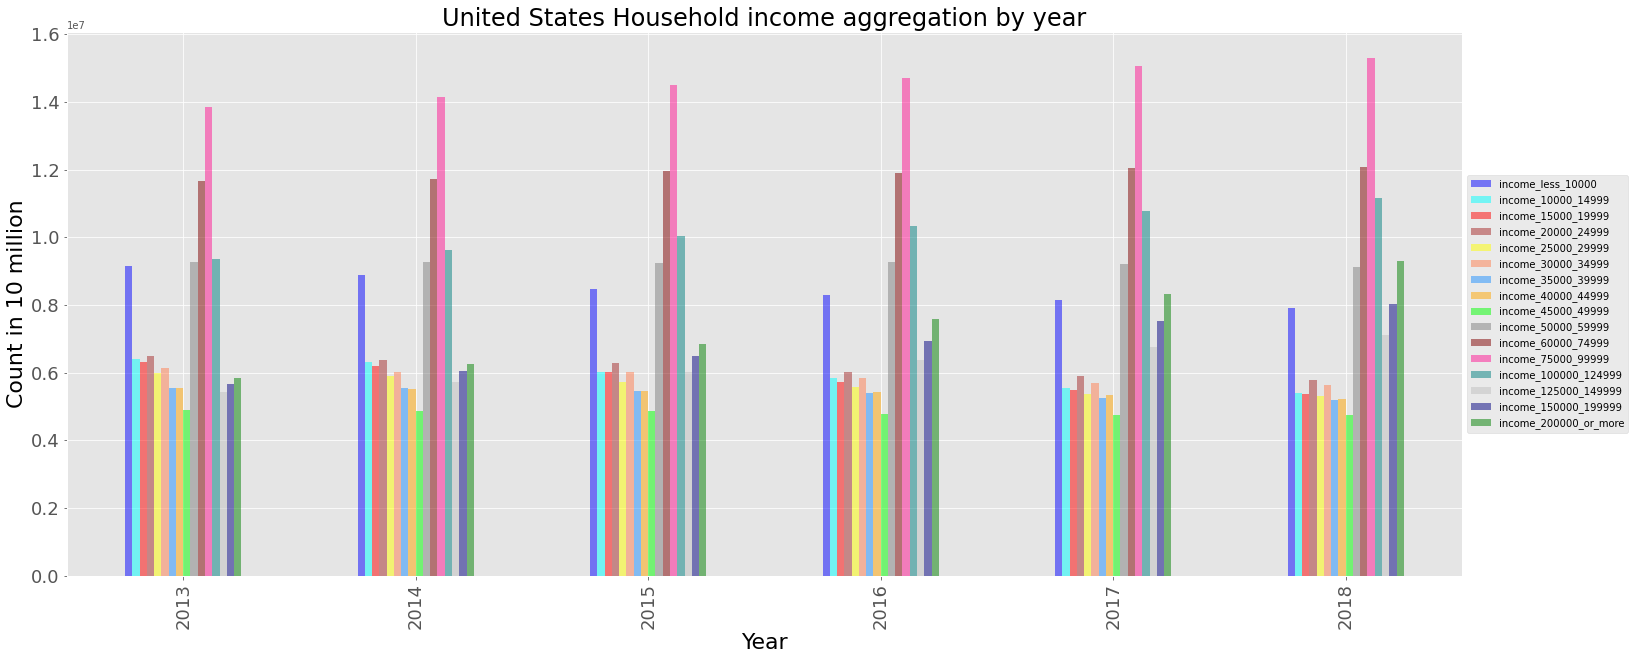

In [60]:
sums_by_year_agg_income=sums_by_year[["do_date"]+bins_]
sums_by_year_agg_income=sums_by_year_agg_income[sums_by_year_agg_income["do_date"]!="2012"]
sums_by_year_agg_income.plot.bar(x="do_date",figsize=(25,10),
                                 alpha=0.5,
                                 color=("blue","aqua","red","brown","yellow","coral","dodgerblue","orange","lime","grey","maroon","deeppink","teal","silver","navy","green"))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('United States Household income aggregation by year', color='black',fontsize='24')
plt.xlabel("Year", color='black',fontsize='22')
plt.ylabel("Count in 10 million", color='black',fontsize='22')
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18)
plt.show()

<h1>2013-2018 NY, CA, TX, FL household income aggregation bar chart</h1>

In [51]:
sums_by_year_geo_id=state_7yrs.groupby(["do_date","geo_id"]).agg(['sum']).reset_index()
sums_by_year_geo_id.columns = sums_by_year_geo_id.columns.get_level_values(0)
sums_by_year_geo_id=sums_by_year_geo_id[sums_by_year_geo_id["do_date"]!="2012"]
sums_by_year_geo_id_NY=sums_by_year_geo_id[sums_by_year_geo_id["geo_id"]=="36"]
sums_by_year_geo_id_CA=sums_by_year_geo_id[sums_by_year_geo_id["geo_id"]=="06"]
sums_by_year_geo_id_TX=sums_by_year_geo_id[sums_by_year_geo_id["geo_id"]=="48"]
sums_by_year_geo_id_FL=sums_by_year_geo_id[sums_by_year_geo_id["geo_id"]=="12"]

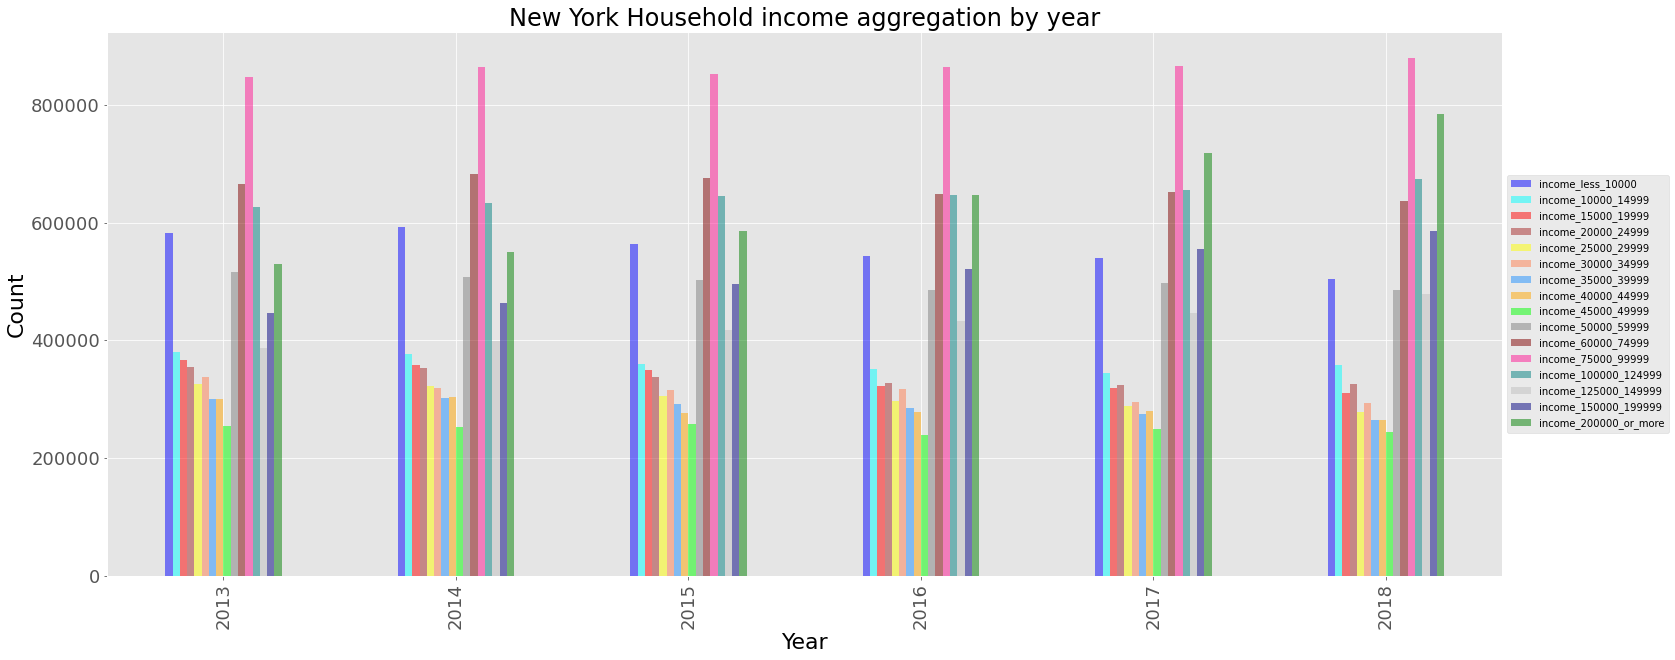

In [61]:
sums_by_year_agg_income_NY=sums_by_year_geo_id_NY[["do_date"]+bins_]
sums_by_year_agg_income_NY.plot.bar(x="do_date",figsize=(25,10),
                                    alpha=0.5,
                                 color=("blue","aqua","red","brown","yellow","coral","dodgerblue","orange","lime","grey","maroon","deeppink","teal","silver","navy","green"))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('New York Household income aggregation by year', color='black',fontsize='24')
plt.xlabel("Year", color='black',fontsize='22')
plt.ylabel("Count", color='black',fontsize='22')
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18)
plt.show()

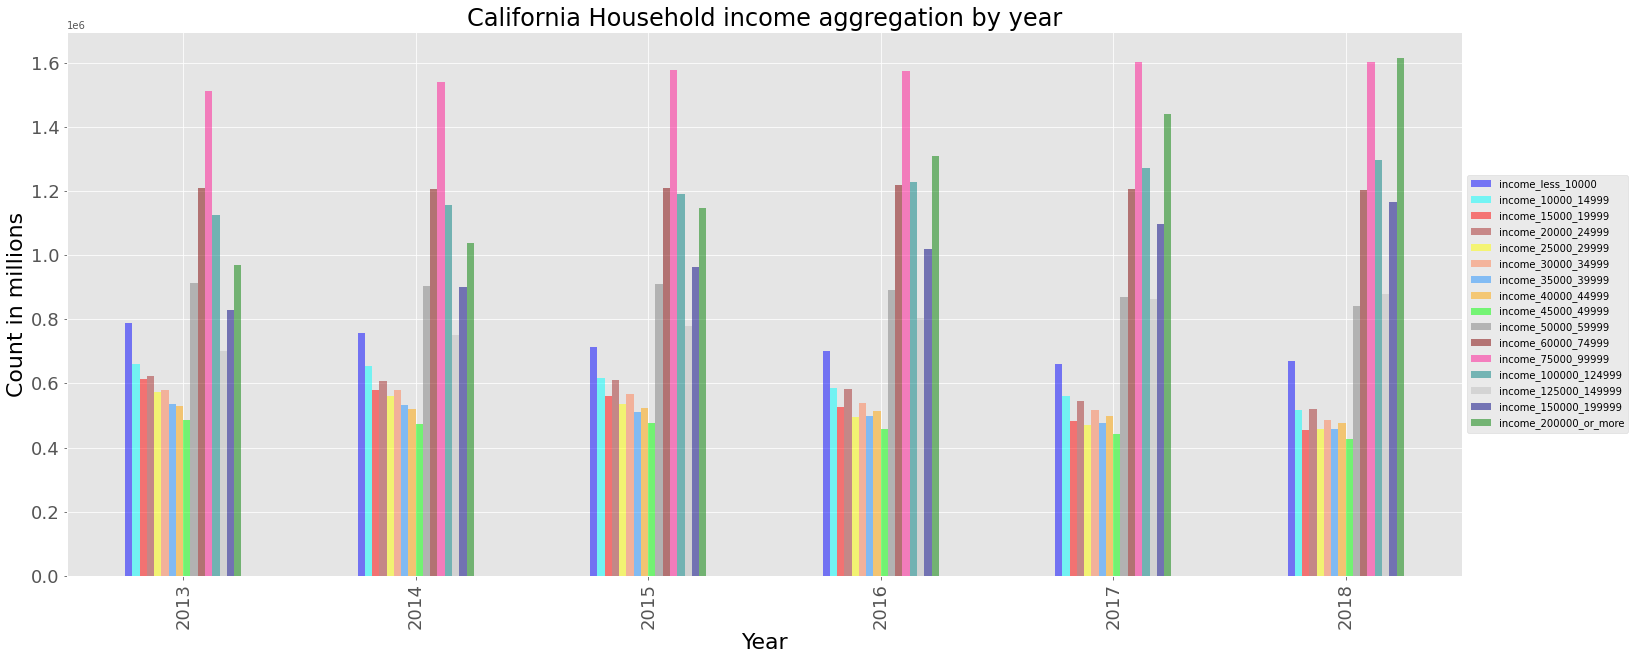

In [65]:
sums_by_year_agg_income_CA=sums_by_year_geo_id_CA[["do_date"]+bins_]
sums_by_year_agg_income_CA.plot.bar(x="do_date",figsize=(25,10),
                                    alpha=0.5,
                                 color=("blue","aqua","red","brown","yellow","coral","dodgerblue","orange","lime","grey","maroon","deeppink","teal","silver","navy","green"))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('California Household income aggregation by year', color='black',fontsize='24')
plt.xlabel("Year", color='black',fontsize='22')
plt.ylabel("Count in millions", color='black',fontsize='22')
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18)
plt.show()

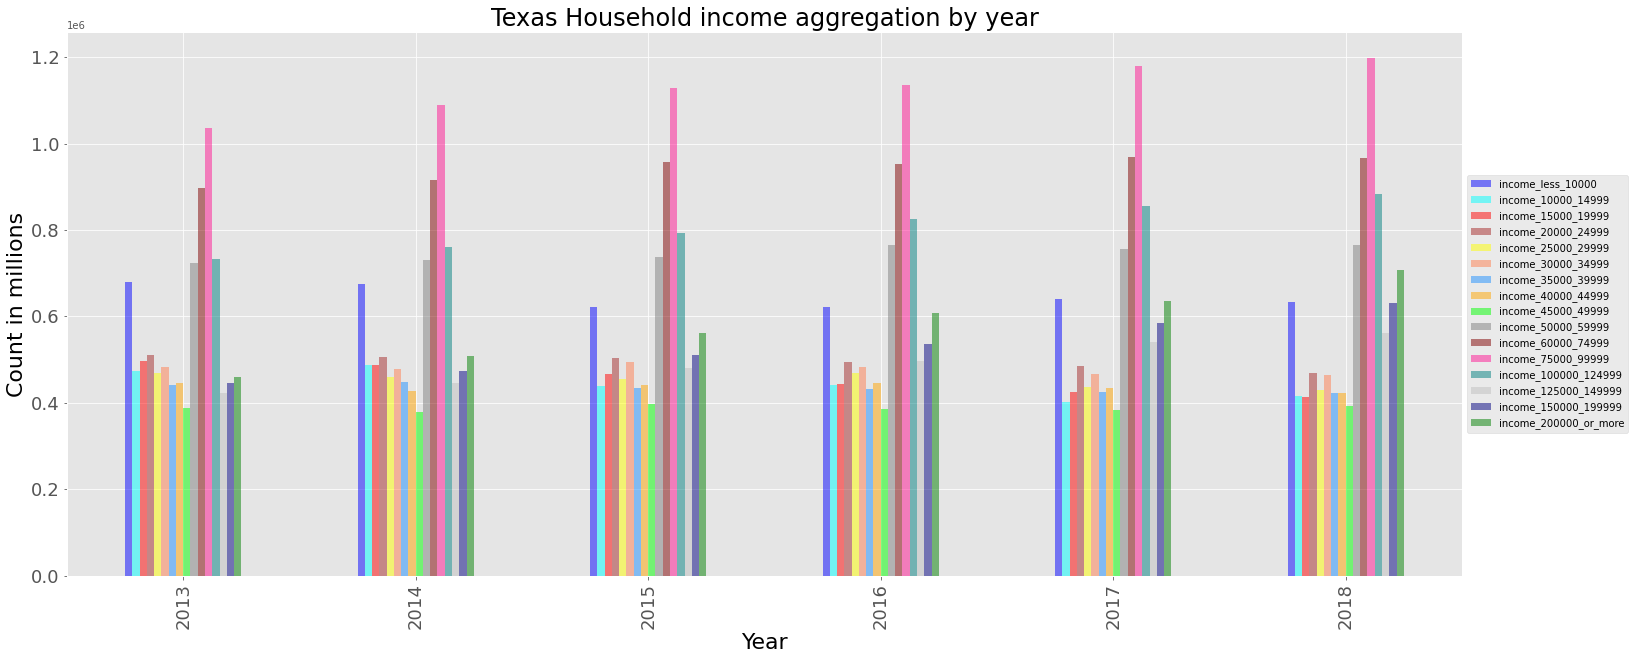

In [68]:
sums_by_year_agg_income_TX=sums_by_year_geo_id_TX[["do_date"]+bins_]
sums_by_year_agg_income_TX.plot.bar(x="do_date",figsize=(25,10),
                                    alpha=0.5,
                                 color=("blue","aqua","red","brown","yellow","coral","dodgerblue","orange","lime","grey","maroon","deeppink","teal","silver","navy","green"))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Texas Household income aggregation by year', color='black',fontsize='24')
plt.xlabel("Year", color='black',fontsize='22')
plt.ylabel("Count in millions", color='black',fontsize='22')
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18)

plt.show()

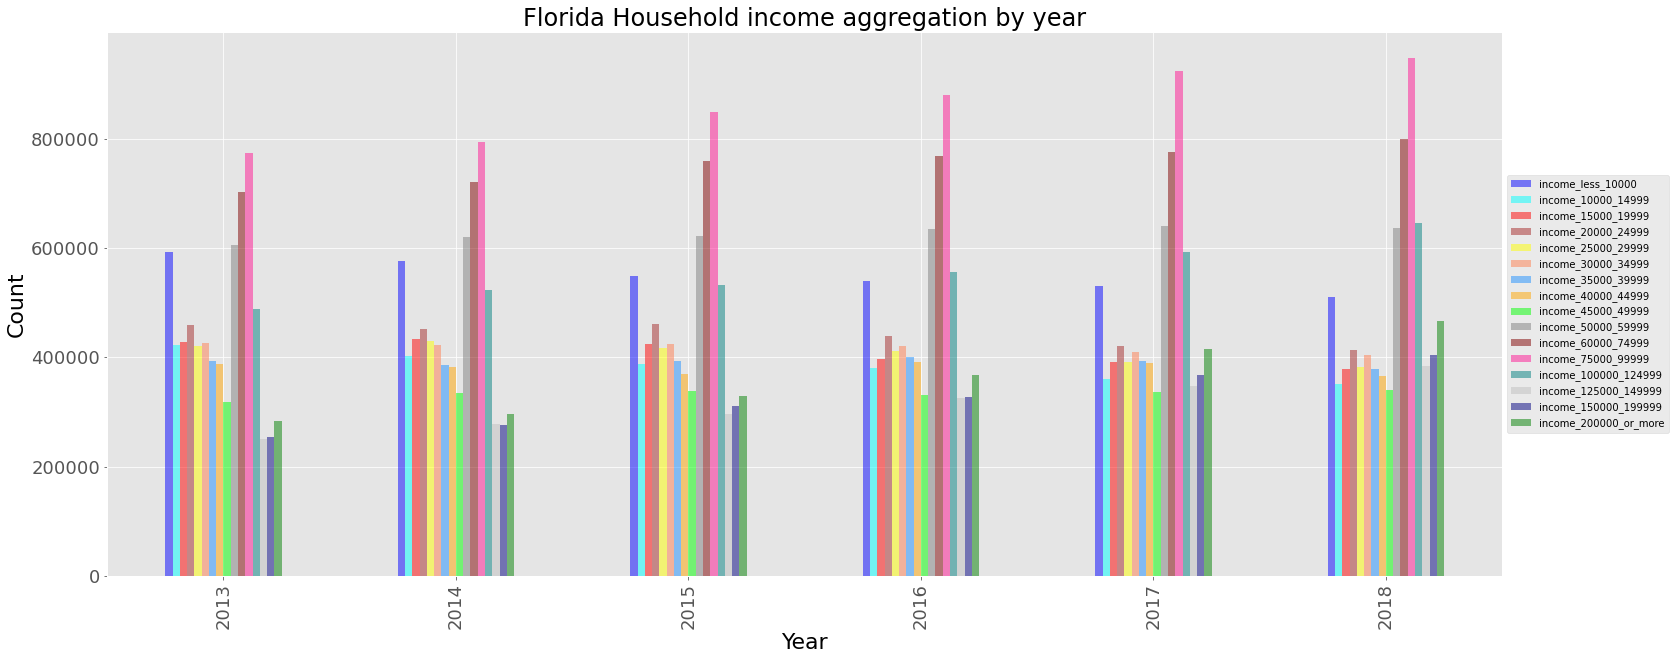

In [67]:
sums_by_year_agg_income_NY=sums_by_year_geo_id_FL[["do_date"]+bins_]
sums_by_year_agg_income_NY.plot.bar(x="do_date",figsize=(25,10),
                                    alpha=0.5,
                                 color=("blue","aqua","red","brown","yellow","coral","dodgerblue","orange","lime","grey","maroon","deeppink","teal","silver","navy","green"))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Florida Household income aggregation by year', color='black',fontsize='24')
plt.xlabel("Year", color='black',fontsize='22')
plt.ylabel("Count", color='black',fontsize='22')
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18)
plt.show()